In [1]:
%pylab inline 
import numpy as np
from smopy import Map
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = genfromtxt("./running_clean_nov.csv", delimiter=',')
lon=data[:,0]
lat=data[:,1]
hour=data[:,3]
minu=data[:,4]
seg=data[:,5]

In [3]:
thour=hour+minu*(1/60)+seg*(1/3600)
r= 6400
x= r*np.sin(radians(90-lat))*np.cos(radians(lon))
y=r*np.sin(radians(90-lat))*np.sin(radians(lon))
z=r*np.cos(radians(90-lat))

uniOriente=[-np.sin(radians(-74.0758)),np.cos(radians(-74.0758)),0]
uniNorte=[np.cos(radians(4.5981))*cos(radians(-74.0758)),np.sin(radians(-74.0758))*cos(radians(4.5981)),-sin(radians(4.5981))]

yBog=np.zeros(len(y))
xBog=np.zeros(len(x))

for i in range(len(x)):
    xBog[i]=x[i]*uniOriente[0]+y[i]*uniOriente[1]+z[i]*uniOriente[2]
    yBog[i]=(x[i]*uniNorte[0]+y[i]*uniNorte[1]+z[i]*uniNorte[2])*-1

x0=xBog[0]
y0=yBog[0]
t0=thour[0]
for i in range(len(xBog)):
    xBog[i]=xBog[i]-x0
    yBog[i]=yBog[i]-y0
    thour[i]=thour[i]-t0


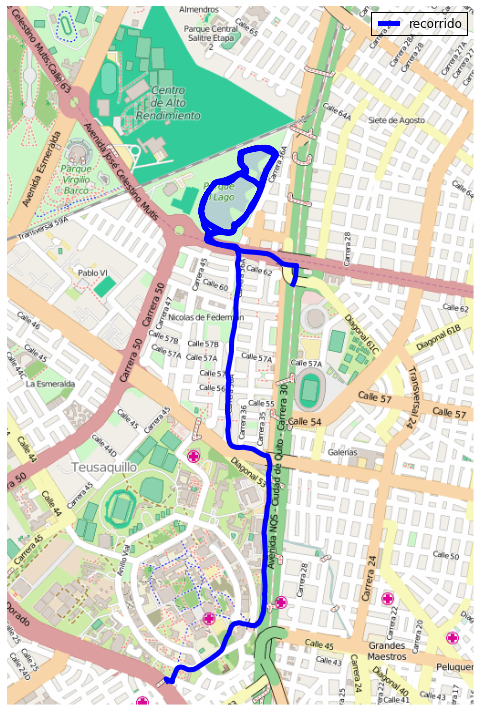

In [4]:
fig=figure(figsize(10,10))
map = Map((4.6322,-74.0842,4.6609,-74.0783), z=15)
ax=map.show_mpl()
x,y=map.to_pixels(lat,lon)
ax.plot(x,y,'-b',label='recorrido',lw=5)
legend()
show()

In [5]:
deltax = []
deltay= []
deltax.append(xBog[0]) #Incluir los ceros iniciales para el for.
deltay.append(yBog[0])

for i in range(1,len(xBog),1):
    deltax.append(xBog[i]-xBog[i-1])
    deltay.append(yBog[i]-yBog[i-1])



dist=[]
sumDis=0
for i in range(len(xBog)):
    sumDis+=sqrt(deltax[i]**2+deltay[i]**2)
    dist.append(sumDis)

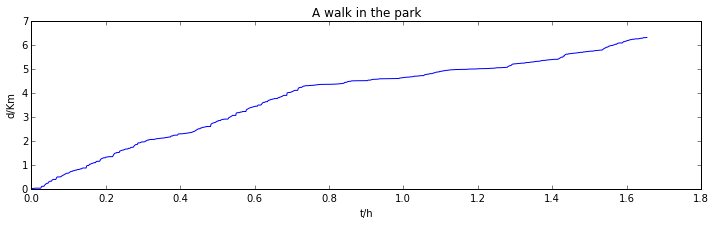

In [26]:
figure(figsize(12,3))
plot(thour,dist)
title('A walk in the park')
ylabel('d/Km')
xlabel('t/h')
show()

In [7]:
funt = interpolate.interp1d(dist,thour,kind='linear')
funlat = interpolate.interp1d(thour,lat,kind='linear')
funlon = interpol_lin = interpolate.interp1d(thour,lon,kind='linear')
funD = interpolate.interp1d(thour,dist,kind='linear')

In [8]:
tiempoInterpol=[]
for i in range(1,7):
    t=funt(i)
    tiempoInterpol.append(t)

latInterpol=[]
lonInterpol=[]
for i in range(6):
    latInterpol.append(funlat(tiempoInterpol[i]))
    lonInterpol.append(funlon(tiempoInterpol[i]))
    

In [9]:
print('Distancia Tiempo Latitud Longitud\n')
for i in range(6):
    print('%.3f     %.3f   %.3f  %.3f\n'%(i+1,tiempoInterpol[i],latInterpol[i],lonInterpol[i]))

Distancia Tiempo Latitud Longitud

1.000     0.155   4.657  -74.080

2.000     0.308   4.656  -74.080

3.000     0.534   4.657  -74.079

4.000     0.687   4.657  -74.080

5.000     1.172   4.654  -74.083

6.000     1.563   4.634  -74.081



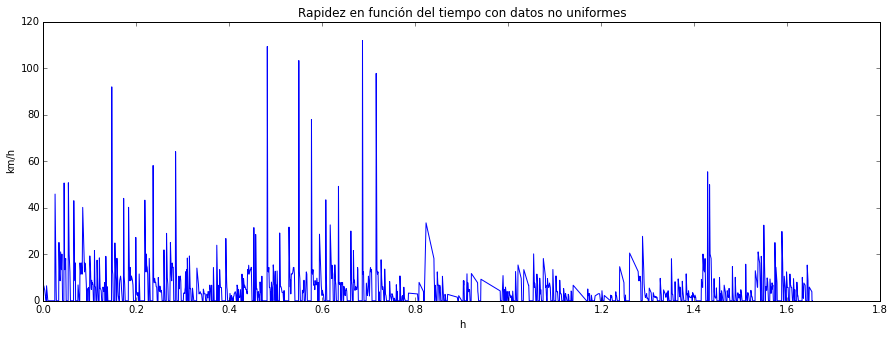

Número de puntos usados para el intervalo: 1863
Tamaño del intervalo usado en minutos: 0.05
velocidad máxima registrada en m/s: 31.0834463438
velocidad media de Usain Bolt al batir el record en 2009 en m/s: 10.416666666666666


In [83]:
h = (thour[-1]-thour[0])/(len(thour)-1) 
yforward = np.roll(dist,-1) 
dy = (yforward-dist)/h
dy = dy[:-1] 

figure(figsize(15,5))
plot(thour[:-1],dy,"-",label="Foward differences")
title('Rapidez en función del tiempo con datos no uniformes')
ylabel('km/h')
xlabel('h')
show()

print('Número de puntos usados para el intervalo:',len(thour))
print('Tamaño del intervalo usado en minutos:',round(h*60,2))
print('velocidad máxima registrada en m/s:',max(dy)*(1000/1)*(1/3600))
print('velocidad media de Usain Bolt al batir el record en 2009 en m/s:', round(37.5*(1000/1)*(1/3600))

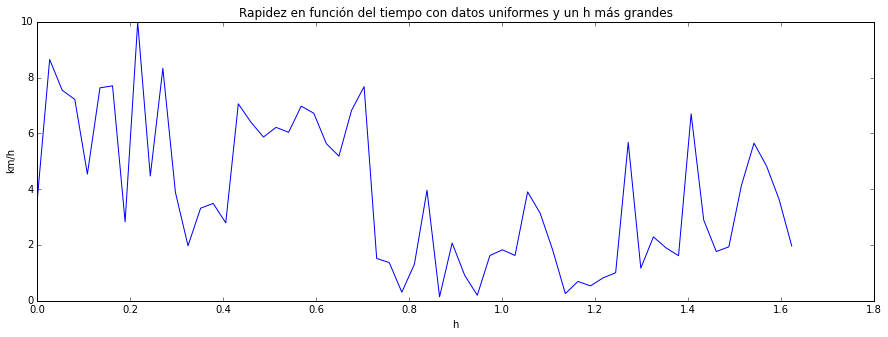

Número de puntos usados para el intervalo: 62
Tamaño del intervalo usado en minutos: 1.62
velocidad máxima registrada en m/s: 2.77340723075
velocidad media de Usain Bolt (al batir el record en 2009) en m/s: 10.416666666666666


In [82]:
tuni=linspace(0,1.65,len(thour)/30)
distInterpol=funD(tuni) 
h = 1.65/(len(tuni)-1) 
yforward = np.roll(distInterpol,-1) 
dyInterpol = (yforward-distInterpol)/h
dyInterpol = dyInterpol[:-1] 


figure(figsize(15,5))
plot(tuni[:-1],dyInterpol,"-",label="Foward differences")
title('Rapidez en función del tiempo con datos uniformes y un h más grandes')
ylabel('km/h')
xlabel('h')
show()
print('Número de puntos usados para el intervalo:',len(tuni))
print('Tamaño del intervalo usado en minutos:',round(h*60,2))
print('velocidad máxima registrada en m/s:',max(dyInterpol)*(1000/1)*(1/3600))
print('velocidad media de Usain Bolt al batir el record en 2009 en m/s:', 37.5*(1000/1)*(1/3600))

#Consideraciones Finales
Cuándo se cálcula la derivada por primera vez se están usado 1863 puntos, los cuales proporcionan un h 'mucho más infinitesimal' por lo que se tiene mucho más detalle de la derivada a pequeños cambios. En nuestro caso estos cambios es probable que hagan parte de la incertidumbre de los datos, por lo tanto no es prudente tomar una derivada 'tan infinitesimal' y tomar una derivada 'más promedio'. Finalmente se tiene que los datos no son homogenos lo que podría afectar la derivada al tener intervalos en los que se puede perder información.

Así de acuerdo a lo anterior lo primero que se decide es crear datos uniformes entre 0 y 1.65 horas que fue lo que duró el recorrido. Además para éstos datos homogenos se decide tomar 62 puntos ya que equivale tomar intervalos de aproximadamente 1.62 minutos para calcular la derivada comparados con los 0.05 minutos de la vez anterior. Además se puede observar que la velocidad máxima la primera vez muestra que es aproximadamente 3 veces la de Usain Bolt, mientras que las segunda vez muestra un resultado más razonable. 

[¿Cuál es la velocidad máxima del ser humano?](http://hipertextual.com/2010/05/cual-es-la-velocidad-maxima-del-ser-humano)